In [1]:
!pip install dionysus
!pip install zarr
!pip install POT
!pip install gudhi
!pip install validclust
#!pip install -Iv rpy2==3.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dionysus: filename=dionysus-2.0.9-cp310-cp310-linux_x86_64.whl size=343748 sha256=9b180227b7c621c497311a0053bf190f79d18a104e55f9bd95340c930beaa0a7
  Stored in directory: /root/.cache/pip/wheels/3c/ba/6a/813c63ae0687291480ca1b2d1b68ab4859aac4eafecf3d009d
Successfully built dionysus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 85.6 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=4d6572e51d576b4ce361d1637a79c262a93b7147e1d82fa9d7ddf9178c9b3b74
  Stored in directory: /

In [2]:
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/NASA/Fire Detection/Test Data 2/")
!ls -ltr

Mounted at /content/drive
total 12819
-rw------- 1 root root 13118050 May  2 07:17  Fire_Labels_2020-2021.csv
drwx------ 2 root root     4096 May 14 23:54  Fire
drwx------ 2 root root     4096 May 15 00:08 'No Fire'


In [3]:
import zarr
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import dionysus as d
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi.wasserstein import wasserstein_distance as wd
from gudhi.representations import Landscape
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from validclust import dunn, cop, ValidClust
from gudhi.wasserstein.barycenter import lagrangian_barycenter
import gudhi
#import rpy2
#import rpy2.robjects as robjects
#from rpy2.robjects import pandas2ri
#import rpy2.robjects.numpy2ri
#rpy2.robjects.numpy2ri.activate()
sns.set_theme()

In [4]:
fname = 'Fire'
fname2 = 'No Fire'

rawFileList = os.listdir(fname)
rawFileList2 = os.listdir(fname2)

testNum = 500
testFileList = rawFileList[0:testNum]
testFileList2 = rawFileList2[0:testNum]
print (testFileList)

['Tile_1_33_20213280116177.zarr', 'Tile_1_33_20213282006177.zarr', 'Tile_1_33_20213282021177.zarr', 'Tile_1_33_20213282026177.zarr', 'Tile_1_33_20213281956177.zarr', 'Tile_1_33_20213280131177.zarr', 'Tile_1_33_20213281951177.zarr', 'Tile_1_33_20213280141177.zarr', 'Tile_1_33_20213280136177.zarr', 'Tile_1_33_20213280121177.zarr', 'Tile_1_33_20213280006177.zarr', 'Tile_1_33_20213280056177.zarr', 'Tile_1_33_20213280021177.zarr', 'Tile_1_33_20213280041177.zarr', 'Tile_1_33_20213280016177.zarr', 'Tile_1_33_20213280011177.zarr', 'Tile_1_33_20213280026177.zarr', 'Tile_1_33_20213272356177.zarr', 'Tile_1_33_20213280106177.zarr', 'Tile_1_33_20213280001177.zarr', 'Tile_1_33_20213272301177.zarr', 'Tile_1_33_20213272326177.zarr', 'Tile_1_33_20213272351177.zarr', 'Tile_1_33_20213272336177.zarr', 'Tile_1_33_20213272306177.zarr', 'Tile_1_33_20213272316177.zarr', 'Tile_1_33_20213272341177.zarr', 'Tile_1_33_20213272321177.zarr', 'Tile_1_33_20213272331177.zarr', 'Tile_1_33_20213272256177.zarr', 'Tile_1_3

In [5]:
channel7ListFire = []
channel7NameFire = []
for name in testFileList:
    channelData = np.array(zarr.open(fname + '//' + name)[:, :, 0]) # select channel 7
    channel7ListFire.append(channelData)
    channel7NameFire.append(name)
    
print (len(channel7ListFire))

500


In [6]:
channel7ListNoFire = []
channel7NameNoFire = []
for name in testFileList2:
    channelData = np.array(zarr.open(fname2 + '//' + name)[:, :, 0]) # select channel 7
    channel7ListNoFire.append(channelData)
    channel7NameNoFire.append(name)
    
print (len(channel7ListNoFire))

500


0.28622063994407654
[0.4536062180995941, 0.5161802768707275, 0.6366353034973145, 0.45829927921295166, 0.4802002012729645, 0.4786358177661896, 0.5130515694618225, 0.45673492550849915, 0.4692496955394745, 0.49584367871284485, 0.46612104773521423, 0.4942793548107147, 0.4410914182662964, 0.4301409423351288, 0.4520418643951416, 0.4504775106906891, 0.48489323258399963, 0.4833289086818695, 0.49584367871284485, 0.43483400344848633, 0.48489323258399963, 0.549031674861908, 0.42544788122177124, 0.4817645251750946, 0.5662395358085632, 0.5850117206573486, 0.45517057180404663, 0.46612104773521423, 0.4942793548107147, 0.4895862638950348, 0.7774268984794617, 0.4489131569862366, 0.411368727684021, 0.7148528695106506, 0.6820014715194702, 0.6162987351417542, 0.7852486371994019, 0.4004182815551758, 0.42701223492622375, 0.800892174243927, 0.5177446603775024, 0.5505959987640381, 0.414497435092926, 0.5787543058395386, 0.49740806221961975, 0.48489323258399963, 0.46612104773521423, 0.5083585381507874, 0.445784

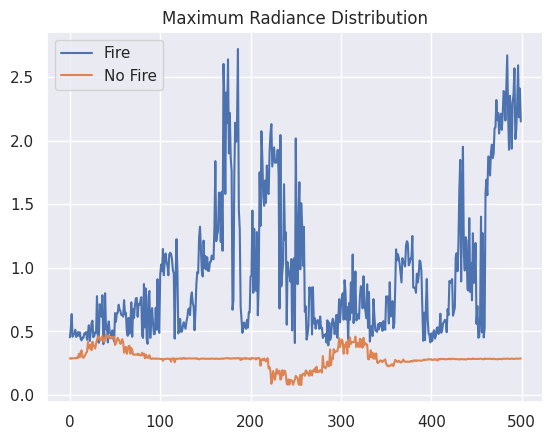

In [8]:
print (np.max(channel7ListNoFire[1]))

maxRadFire = []
maxRadNoFire = []
for i in range(testNum):
    temp1 = np.max(channel7ListFire[i])
    temp2 = np.max(channel7ListNoFire[i])
    maxRadFire.append(temp1)
    maxRadNoFire.append(temp2)

print (maxRadFire)
print (maxRadNoFire)

plt.plot(maxRadFire, label = 'Fire')
plt.plot(maxRadNoFire, label = 'No Fire')
plt.legend(loc="upper left")
plt.title('Maximum Radiance Distribution')
plt.show()

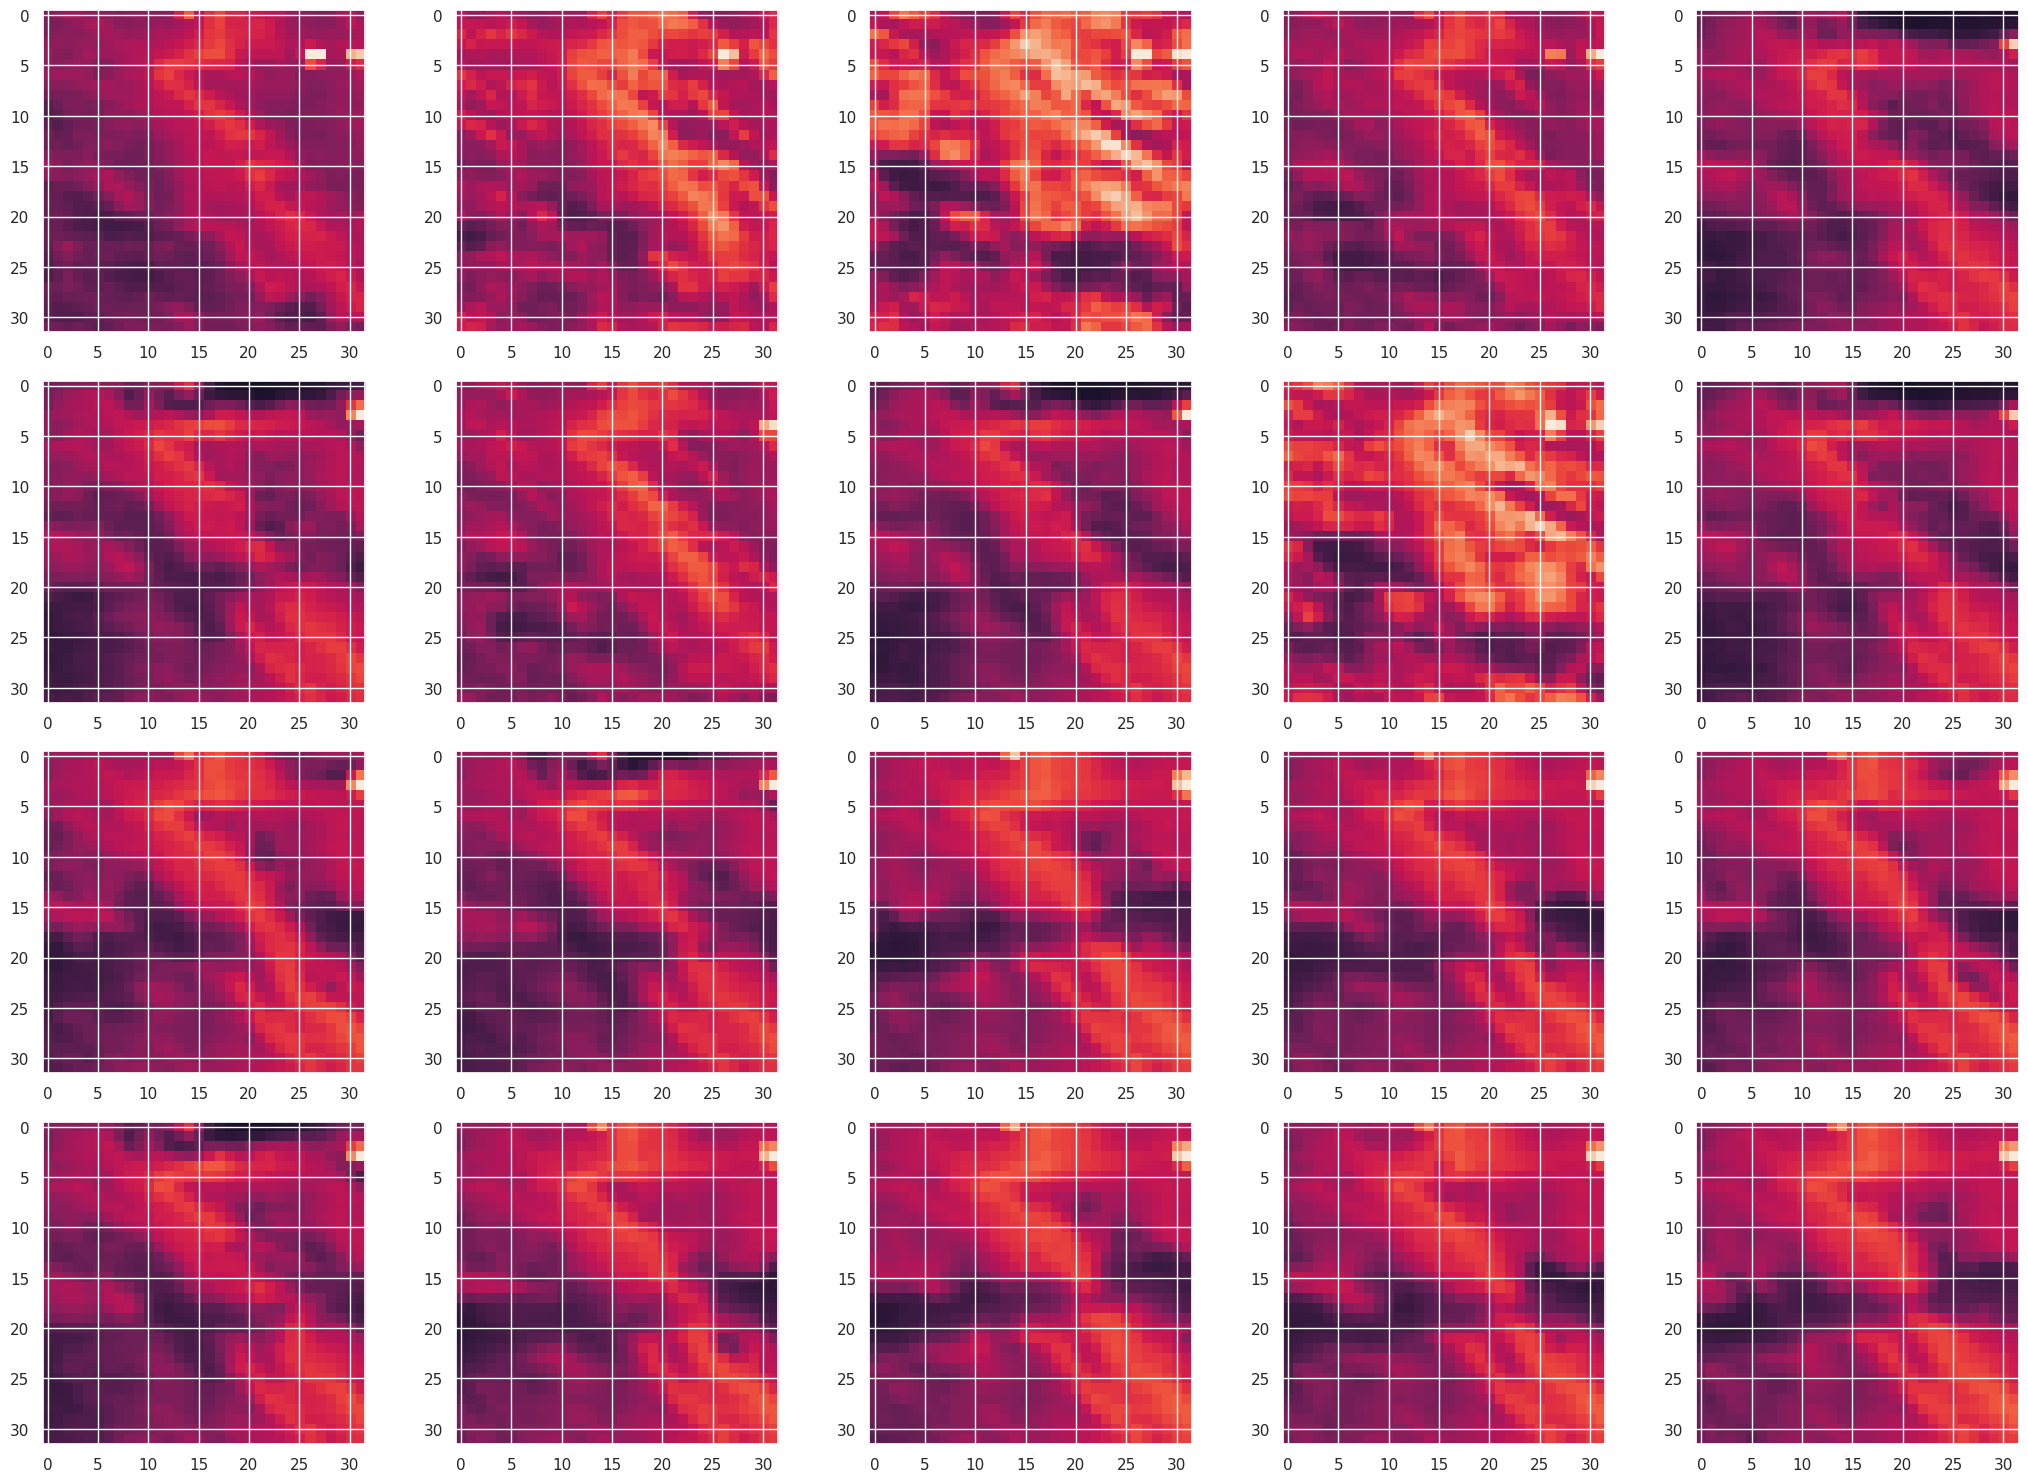

In [71]:
fig, axs = plt.subplots(4, 5, figsize=(21, 15))

for i in range(4):
    for j in range(5):
        #axs[i, j].imshow(channel7List[i* 6 + j], vmin=0, vmax=4) # vmin, vmax may change on different tiles
        axs[i, j].imshow(channel7ListFire[i* 5 + j + 60], vmin=0, vmax=0.5)
        #seriesStartTime = channel7NameFire[i* 5 + j].split('_')[3].split('.')[0]
        #label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
        #axs[i, j].title.set_text('Label {}'.format(label))

plt.tight_layout()

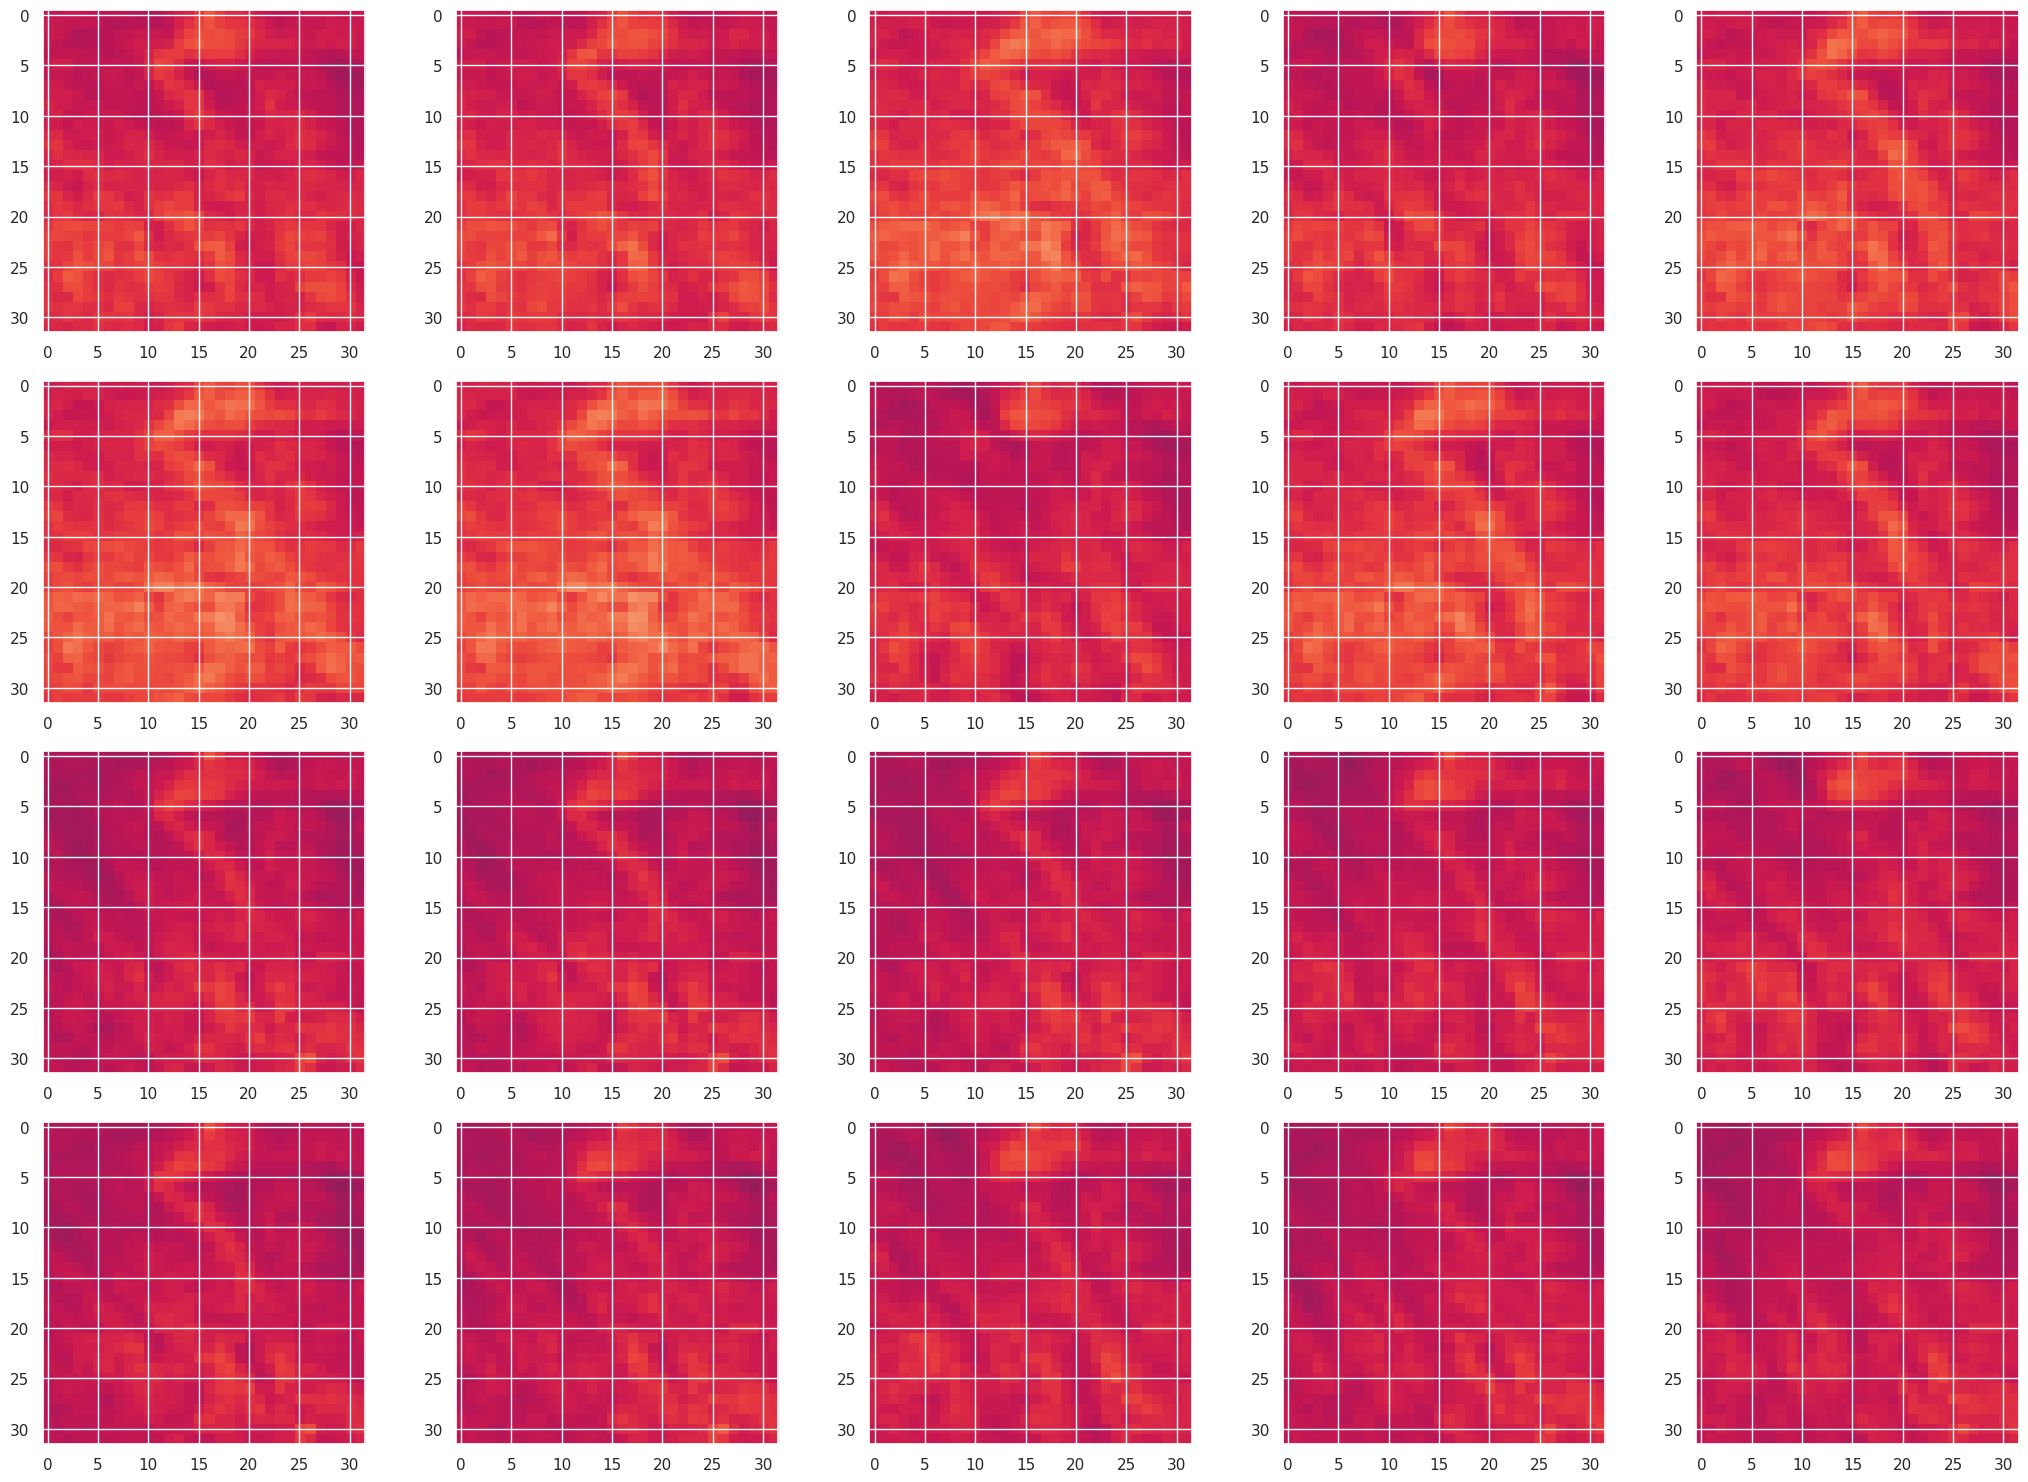

In [72]:
fig, axs = plt.subplots(4, 5, figsize=(21, 15))

for i in range(4):
    for j in range(5):
        #axs[i, j].imshow(channel7List[i* 6 + j], vmin=0, vmax=4) # vmin, vmax may change on different tiles
        axs[i, j].imshow(channel7ListNoFire[i* 5 + j + 60], vmin=0, vmax=0.5)
        seriesStartTime = channel7NameNoFire[i* 5 + j].split('_')[3].split('.')[0]
        #label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
        #axs[i, j].title.set_text('Label {}'.format(label))

plt.tight_layout()